In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -O NeuMa_Raw.zip "https://ndownloader.figshare.com/articles/22117001/versions/4"
!unzip NeuMa_Raw.zip

--2025-02-15 09:19:12--  https://ndownloader.figshare.com/articles/22117001/versions/4
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.216.172.20, 34.247.144.229, 54.73.151.217, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.216.172.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695436592 (663M) [application/zip]
Saving to: ‘NeuMa_Raw.zip’

NeuMa_Raw.zip       100%[===================>] 663.22M  15.4MB/s    in 25s     

2025-02-15 09:19:37 (26.4 MB/s) - ‘NeuMa_Raw.zip’ saved [695436592/695436592]

Archive:  NeuMa_Raw.zip
 extracting: Neuma_RawDataset_Info.pdf  
 extracting: S01.xdf                 
 extracting: S01.xlsx                
 extracting: S02.xdf                 
 extracting: S02.xlsx                
 extracting: S03.xdf                 
 extracting: S03.xlsx                
 extracting: S05.xdf                 
 extracting: S05.xlsx                
 extracting: S06.xdf                 
 extracting: S

In [ ]:
df = pd.read_excel("/content/S01.xlsx")

In [ ]:
df.head()

,Subject ID,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78
0,S01,24.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,7.0,...,2.0,3.0,2.0,3.0,1.0,4.0,0.0,16I,16A,16D
1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34G,34A,34C
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65C,65A,65D
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65G,49B,49C
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49H,59B,59B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subject ID      2 non-null      object 
 1   Age             1 non-null      float64
 2   Gender          1 non-null      float64
 3   Hand            1 non-null      float64
 4   Education       1 non-null      float64
 5   Marital Status  1 non-null      float64
 6   Children        1 non-null      float64
 7   Q1              1 non-null      float64
 8   Q2              1 non-null      float64
 9   Q3              1 non-null      float64
 10  Q4              1 non-null      float64
 11  Q5              1 non-null      float64
 12  Q6              1 non-null      float64
 13  Q7              1 non-null      float64
 14  Q8              1 non-null      float64
 15  Q9              1 non-null      float64
 16  Q10             1 non-null      float64
 17  Q11             1 non-null      float

Let's make the structre better for this file and then make a function to combine all the excel files for better analysis

In [ ]:
df_q76 = df[['Q76']].dropna(subset=['Q76']).reset_index(drop=True)

In [ ]:
df_q76

,Q76
0,16I
1,34G
2,65C
3,65G
4,49H
5,59F
6,70I
7,114E
8,142E
9,142G


In [ ]:
values = df_q76['Q76'].values

In [ ]:
df_q76_rotated = pd.DataFrame(values.reshape(1, -1))

In [ ]:
df_q76_rotated.columns = [f"Q76_{i+1}" for i in range(df_q76_rotated.shape[1])]

In [ ]:
df_q76_rotated

,Q76_1,Q76_2,Q76_3,Q76_4,Q76_5,Q76_6,Q76_7,Q76_8,Q76_9,Q76_10,Q76_11,Q76_12,Q76_13,Q76_14,Q76_15,Q76_16
0,16I,34G,65C,65G,49H,59F,70I,114E,142E,142G,4C,4H,8H,24F,61F,61H


In [ ]:
df_q77 = pd.DataFrame({'Q77': df['Q77'].dropna().reset_index(drop=True)})
values_q77 = df_q77['Q77'].values
df_q77_rotated = pd.DataFrame(values_q77.reshape(1, -1))
df_q77_rotated.columns = [f"Q77_{i+1}" for i in range(df_q77_rotated.shape[1])]
df_q77_rotated

,Q77_1,Q77_2,Q77_3,Q77_4,Q77_5,Q77_6,Q77_7,Q77_8,Q77_9,Q77_10,Q77_11,Q77_12
0,16A,34A,65A,49B,59B,70B,114A,142A,4B,8B,24B,61A


In [ ]:
df_q78 = pd.DataFrame({'Q78': df['Q78'].dropna().reset_index(drop=True)})
values_q78 = df_q78['Q78'].values
df_q78_rotated = pd.DataFrame(values_q78.reshape(1, -1))
df_q78_rotated.columns = [f"Q78_{i+1}" for i in range(df_q78_rotated.shape[1])]
df_q78_rotated

,Q78_1,Q78_2,Q78_3,Q78_4,Q78_5,Q78_6,Q78_7,Q78_8,Q78_9,Q78_10,Q78_11,Q78_12
0,16D,34C,65D,49C,59B,70B,114E,142E,4A,8A,24A,61E


In [ ]:
df_first = df.iloc[[0]].copy()
df_first = pd.concat([df_first, df_q76_rotated, df_q77_rotated, df_q78_rotated], axis=1)

In [ ]:
df_first = df_first.drop(columns=['Q76', 'Q77', 'Q78'])

In [ ]:
df_first

,Subject ID,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q78_3,Q78_4,Q78_5,Q78_6,Q78_7,Q78_8,Q78_9,Q78_10,Q78_11,Q78_12
0,S01,24.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,7.0,...,65D,49C,59B,70B,114E,142E,4A,8A,24A,61E


In [ ]:
def process_subject_df(df):
    df_q76 = pd.DataFrame({'Q76': df['Q76'].dropna().reset_index(drop=True)})
    if not df_q76.empty:
        values_q76 = df_q76['Q76'].values
        df_q76_rotated = pd.DataFrame(values_q76.reshape(1, -1))
        df_q76_rotated.columns = [f"Q76_{i+1}" for i in range(df_q76_rotated.shape[1])]
    else:
        df_q76_rotated = pd.DataFrame()

    df_q77 = pd.DataFrame({'Q77': df['Q77'].dropna().reset_index(drop=True)})
    if not df_q77.empty:
        values_q77 = df_q77['Q77'].values
        df_q77_rotated = pd.DataFrame(values_q77.reshape(1, -1))
        df_q77_rotated.columns = [f"Q77_{i+1}" for i in range(df_q77_rotated.shape[1])]
    else:
        df_q77_rotated = pd.DataFrame()

    df_q78 = pd.DataFrame({'Q78': df['Q78'].dropna().reset_index(drop=True)})
    if not df_q78.empty:
        values_q78 = df_q78['Q78'].values
        df_q78_rotated = pd.DataFrame(values_q78.reshape(1, -1))
        df_q78_rotated.columns = [f"Q78_{i+1}" for i in range(df_q78_rotated.shape[1])]
    else:
        df_q78_rotated = pd.DataFrame()
    df_first = df.iloc[[0]].copy()
    df_first = df_first.drop(columns=['Q76', 'Q77', 'Q78'], errors='ignore')
    result_df = pd.concat([df_first, df_q76_rotated, df_q77_rotated, df_q78_rotated], axis=1)

    return result_df

In [ ]:
df_first = process_subject_df(df)
df_first

,Subject ID,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q78_3,Q78_4,Q78_5,Q78_6,Q78_7,Q78_8,Q78_9,Q78_10,Q78_11,Q78_12
0,S01,24.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,7.0,...,65D,49C,59B,70B,114E,142E,4A,8A,24A,61E


Let's make the funciton better !

In [ ]:
import glob

In [ ]:
def rotate_and_append_columns(df, cols_to_rotate):
    df_first = df.iloc[[0]].copy()
    df_first = df_first.drop(columns=cols_to_rotate, errors='ignore')
    for col in cols_to_rotate:
        responses = df[col].dropna().reset_index(drop=True)
        if not responses.empty:
            arr = responses.values
            rotated_df = pd.DataFrame(arr.reshape(1, -1),
                                      columns=[f"{col}_{i+1}" for i in range(len(arr))])
            df_first = pd.concat([df_first, rotated_df], axis=1)

    return df_first

In [ ]:
file_list = glob.glob('*.xlsx')
all_subjects = []
error_list = []

In [ ]:
for file in file_list:
  try:
    df = pd.read_excel(file)
    processed = rotate_and_append_columns(df, ['Q76', 'Q77', 'Q78'])
    all_subjects.append(processed)

  except Exception as e:
        error_list.append({'file': file, 'error': str(e)})


In [ ]:
len(error_list)

2

In [ ]:
# there is one df with some error lets check that one out

In [ ]:
error_list

[{'file': 'S09.xlsx', 'error': "'Q78'"},
 {'file': 'aggregated_processed.xlsx', 'error': "'Q76'"}]

In [ ]:
df = pd.read_excel("S09.xlsx")

In [ ]:
df

,Subject ID,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q75.1,Q76,Q77
0,9.0,54.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,7.0,...,3.0,4.0,3.0,2.0,1.0,9.0,0.0,15C,15B,15E
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9A,9B,9B
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9C,3A,3E
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3F,38A,38D
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38F,43B,43A
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43F,27A,27D
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27F,60A,60E
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60F,65A,65E
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65F,76A,76D
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76F,74A,74E


In [ ]:
#alr so here the error was the bad naming

In [ ]:
df.rename(columns={'Q77':'Q78','Q76':'Q77','Q75.1': 'Q76'}, inplace=True)

In [ ]:
df.head()

,Subject ID,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78
0,9.0,54.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,7.0,...,3.0,4.0,3.0,2.0,1.0,9.0,0.0,15C,15B,15E
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9A,9B,9B
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9C,3A,3E
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3F,38A,38D
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38F,43B,43A


In [ ]:
processed = rotate_and_append_columns(df, ['Q76', 'Q77', 'Q78'])
all_subjects.append(processed)

In [ ]:
aggregated_df = pd.concat(all_subjects, ignore_index=True)
aggregated_df.to_excel('aggregated_processed.xlsx', index=False)

In [ ]:
df = aggregated_df

In [ ]:
print(df.columns)

Index(['Subject ID', 'Age', 'Gender', 'Hand', 'Education', 'Marital Status',
       'Children', 'Q1', 'Q2', 'Q3',
       ...
       'Q76_68', 'Q76_69', 'Q76_70', 'Q76_71', 'Q76_72', 'Q76_73', 'Q77_32',
       'Q77_33', 'Q78_32', 'Q78_33'],
      dtype='object', length=241)


In [ ]:
df.describe()

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q70,Q71,Q72,Q73,Q74,Q75,Unnamed: 12,Unnamed: 15,Κωδικός Συμμετεχοντα,Ηλικια
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,41.000000,41.00000,42.000000,42.000000,...,42.00000,42.000000,42.00000,31.000000,30.000000,31.000000,0.0,0.0,1.0,1.0
mean,30.619048,1.547619,1.166667,5.166667,1.190476,1.785714,1.390244,2.00000,7.523810,7.000000,...,3.50000,3.190476,2.97619,1.129032,38.733333,4.741935,NaN,NaN,25.0,38.0
std,9.950983,0.861150,0.659514,1.286263,0.454683,0.564637,0.702782,0.74162,1.811051,1.448296,...,0.83374,1.041530,0.99971,0.340777,45.066184,18.786463,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,3.000000,...,2.00000,2.000000,1.00000,1.000000,0.000000,0.000000,NaN,NaN,25.0,38.0
25%,25.250000,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,2.00000,7.000000,6.000000,...,3.00000,2.000000,2.00000,1.000000,0.000000,0.000000,NaN,NaN,25.0,38.0
50%,28.500000,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,2.00000,8.000000,7.000000,...,4.00000,3.000000,3.00000,1.000000,20.500000,0.000000,NaN,NaN,25.0,38.0
75%,34.000000,2.000000,1.000000,6.000000,1.000000,2.000000,2.000000,2.00000,8.000000,8.000000,...,4.00000,4.000000,4.00000,1.000000,75.000000,0.000000,NaN,NaN,25.0,38.0
max,59.000000,6.000000,5.000000,7.000000,3.000000,3.000000,4.000000,4.00000,10.000000,10.000000,...,5.00000,5.000000,5.00000,2.000000,136.000000,89.000000,NaN,NaN,25.0,38.0


In [ ]:
df_clean = df.dropna(how='all')

In [ ]:
df_clean = df_clean.set_index('Subject ID')

In [ ]:
df_clean

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_68,Q76_69,Q76_70,Q76_71,Q76_72,Q76_73,Q77_32,Q77_33,Q78_32,Q78_33
Subject ID,,,,,,,,,,,,,,,,,,,,,
3.0,24.0,2.0,1.0,6.0,3.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44.0,24.0,2.0,1.0,5.0,1.0,2.0,1.0,1.0,9.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39.0,26.0,1.0,1.0,5.0,1.0,2.0,1.0,3.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.0,26.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,30.0,2.0,1.0,4.0,1.0,2.0,1.0,3.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,25.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.0,30.0,1.0,1.0,5.0,1.0,0.0,1.0,4.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.0,30.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,8.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.0,29.0,2.0,1.0,6.0,1.0,2.0,2.0,2.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df_clean

In [ ]:
df = df[~df.index.isna()]

In [ ]:
df.index = df.index.to_series().replace('S01',1)

<ipython-input-128-25af52288c55>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.index = df.index.to_series().replace('S01',1)


In [ ]:
df

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_68,Q76_69,Q76_70,Q76_71,Q76_72,Q76_73,Q77_32,Q77_33,Q78_32,Q78_33
Subject ID,,,,,,,,,,,,,,,,,,,,,
3.0,24.0,2.0,1.0,6.0,3.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44.0,24.0,2.0,1.0,5.0,1.0,2.0,1.0,1.0,9.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39.0,26.0,1.0,1.0,5.0,1.0,2.0,1.0,3.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.0,26.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,30.0,2.0,1.0,4.0,1.0,2.0,1.0,3.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,25.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.0,30.0,1.0,1.0,5.0,1.0,0.0,1.0,4.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.0,30.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,8.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.0,29.0,2.0,1.0,6.0,1.0,2.0,2.0,2.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.sort_index()
df.head()

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_68,Q76_69,Q76_70,Q76_71,Q76_72,Q76_73,Q77_32,Q77_33,Q78_32,Q78_33
Subject ID,,,,,,,,,,,,,,,,,,,,,
1.0,24.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.0,6.0,2.0,1.0,1.0,3.0,NaN,NaN,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,22.0,2.0,1.0,5.0,1.0,2.0,1.0,3.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,24.0,2.0,1.0,6.0,3.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,26.0,1.0,2.0,5.0,1.0,2.0,2.0,1.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Gender'].unique()

array([1., 6., 2.])

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    unique_vals = df[col].unique()
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 40)

Column: Age
Unique values (19): [24.  1. 22. 26. 25. 31. 54. 49. 30. 59. 35. 27. 55. 23. 29. 36. 28. 37.
 39.]
----------------------------------------
Column: Gender
Unique values (3): [1. 6. 2.]
----------------------------------------
Column: Hand
Unique values (3): [1. 2. 5.]
----------------------------------------
Column: Education
Unique values (6): [5. 1. 6. 4. 3. 7.]
----------------------------------------
Column: Marital Status
Unique values (3): [1. 3. 2.]
----------------------------------------
Column: Children
Unique values (4): [2. 3. 1. 0.]
----------------------------------------
Column: Q1
Unique values (5): [ 1. nan  2.  3.  4.]
----------------------------------------
Column: Q2
Unique values (5): [ 1. nan  3.  2.  4.]
----------------------------------------
Column: Q3
Unique values (8): [ 7.  8.  1.  3.  9. 10.  6.  5.]
----------------------------------------
Column: Q4
Unique values (8): [ 6.  8.  7.  5. 10.  9.  4.  3.]
----------------------------------------

In [ ]:
df = df.drop(columns=["Κωδικός Συμμετεχοντα", "Ηλικια"], errors='ignore')

In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    unique_vals = df[col].unique()
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 40)

Column: Age
Unique values (19): [24.  1. 22. 26. 25. 31. 54. 49. 30. 59. 35. 27. 55. 23. 29. 36. 28. 37.
 39.]
----------------------------------------
Column: Gender
Unique values (3): [1. 6. 2.]
----------------------------------------
Column: Hand
Unique values (3): [1. 2. 5.]
----------------------------------------
Column: Education
Unique values (6): [5. 1. 6. 4. 3. 7.]
----------------------------------------
Column: Marital Status
Unique values (3): [1. 3. 2.]
----------------------------------------
Column: Children
Unique values (4): [2. 3. 1. 0.]
----------------------------------------
Column: Q1
Unique values (5): [ 1. nan  2.  3.  4.]
----------------------------------------
Column: Q2
Unique values (5): [ 1. nan  3.  2.  4.]
----------------------------------------
Column: Q3
Unique values (8): [ 7.  8.  1.  3.  9. 10.  6.  5.]
----------------------------------------
Column: Q4
Unique values (8): [ 6.  8.  7.  5. 10.  9.  4.  3.]
----------------------------------------

In [ ]:
#removing the columns with less than 2 -3 values

In [ ]:
cols_to_remove = [
    "Q77_29", "Q77_30", "Q77_31",
    "Q78_29", "Q78_30", "Q78_31",
    "Q76_47", "Q76_48", "Q76_49", "Q76_50", "Q76_51", "Q76_52",
    "Q76_53", "Q76_54", "Q76_55", "Q76_56", "Q76_57", "Q76_58",
    "Q76_59", "Q76_60", "Q76_61", "Q76_62", "Q76_63", "Q76_64",
    "Q76_65", "Q76_66", "Q76_67", "Q76_68", "Q76_69", "Q76_70",
    "Q76_71", "Q76_72", "Q76_73",
    "Q77_32", "Q77_33",
    "Q78_32", "Q78_33"
]
df = df.drop(columns=cols_to_remove, errors='ignore')


In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    unique_vals = df[col].unique()
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 40)

Column: Age
Unique values (19): [24.  1. 22. 26. 25. 31. 54. 49. 30. 59. 35. 27. 55. 23. 29. 36. 28. 37.
 39.]
----------------------------------------
Column: Gender
Unique values (3): [1. 6. 2.]
----------------------------------------
Column: Hand
Unique values (3): [1. 2. 5.]
----------------------------------------
Column: Education
Unique values (6): [5. 1. 6. 4. 3. 7.]
----------------------------------------
Column: Marital Status
Unique values (3): [1. 3. 2.]
----------------------------------------
Column: Children
Unique values (4): [2. 3. 1. 0.]
----------------------------------------
Column: Q1
Unique values (5): [ 1. nan  2.  3.  4.]
----------------------------------------
Column: Q2
Unique values (5): [ 1. nan  3.  2.  4.]
----------------------------------------
Column: Q3
Unique values (8): [ 7.  8.  1.  3.  9. 10.  6.  5.]
----------------------------------------
Column: Q4
Unique values (8): [ 6.  8.  7.  5. 10.  9.  4.  3.]
----------------------------------------

In [ ]:
rows_gender_6 = df[df['Gender'] == 6.0]
rows_gender_6

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_39,Q76_40,Q77_28,Q78_28,Q76_41,Q76_42,Q76_43,Q76_44,Q76_45,Q76_46
Subject ID,,,,,,,,,,,,,,,,,,,,,
2.0,1.0,6.0,2.0,1.0,1.0,3.0,NaN,NaN,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_39,Q76_40,Q77_28,Q78_28,Q76_41,Q76_42,Q76_43,Q76_44,Q76_45,Q76_46
Subject ID,,,,,,,,,,,,,,,,,,,,,
1.0,24.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.0,6.0,2.0,1.0,1.0,3.0,NaN,NaN,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,22.0,2.0,1.0,5.0,1.0,2.0,1.0,3.0,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,24.0,2.0,1.0,6.0,3.0,2.0,1.0,2.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,26.0,1.0,2.0,5.0,1.0,2.0,2.0,1.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,24.0,1.0,1.0,5.0,1.0,2.0,1.0,3.0,8.0,7.0,...,117A,114B,NaN,NaN,114F,125B,125H,136B,136C,136F
7.0,25.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,31.0,2.0,1.0,6.0,1.0,2.0,1.0,2.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,54.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_excel('aggregated_processed.xlsx', index=False)

In [ ]:
!pip install pyxdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
langchain 0.3.18 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
pytenso

In [ ]:
import pyxdf

In [ ]:
def analyze_xdf_file(xdf_file):
    streams, header = pyxdf.load_xdf(xdf_file)
    print(header)
    print("Number of streams:", len(streams))
    for i, stream in enumerate(streams):
        name = stream['info']['name'][0]
        stype = stream['info']['type'][0]
        srate = stream['info']['nominal_srate'][0] if 'nominal_srate' in stream['info'] else "Unknown"
        nchans = stream['info']['channel_count'][0] if 'channel_count' in stream['info'] else "Unknown"
        print(f"Stream {i}:")
        print(f"  Name: {name}")
        print(f"  Type: {stype}")
        print(f"  Sampling Rate: {srate}")
        print(f"  Number of Channels: {nchans}")
    eeg_stream = None
    for stream in streams:
        if stream['info']['type'][0].upper() == 'EEG':
            eeg_stream = stream
            break
    if eeg_stream is not None:
        eeg_data = np.array(eeg_stream['time_series'])
        print("EEG data shape:", eeg_data.shape)
        plt.figure(figsize=(12, 4))
        plt.plot(eeg_data[:300, 0])
        plt.title("EEG Channel 1 - First 300 Samples")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.show()
    else:
        print("No EEG stream found in this XDF file.")

{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2022-04-01T14:01:02+0300']})}
Number of streams: 5
Stream 0:
  Name: MyMarkerStream3
  Type: Markers
  Sampling Rate: 0.000000000000000
  Number of Channels: 1
Stream 1:
  Name: MouseButtons
  Type: Markers
  Sampling Rate: 0.000000000000000
  Number of Channels: 1
Stream 2:
  Name: Tobii
  Type: Eyetracker
  Sampling Rate: 600.0000000000000
  Number of Channels: 6
Stream 3:
  Name: MousePosition
  Type: Position
  Sampling Rate: 0.000000000000000
  Number of Channels: 2
Stream 4:
  Name: WS-default
  Type: EEG
  Sampling Rate: 300
  Number of Channels: 24
EEG data shape: (110555, 24)


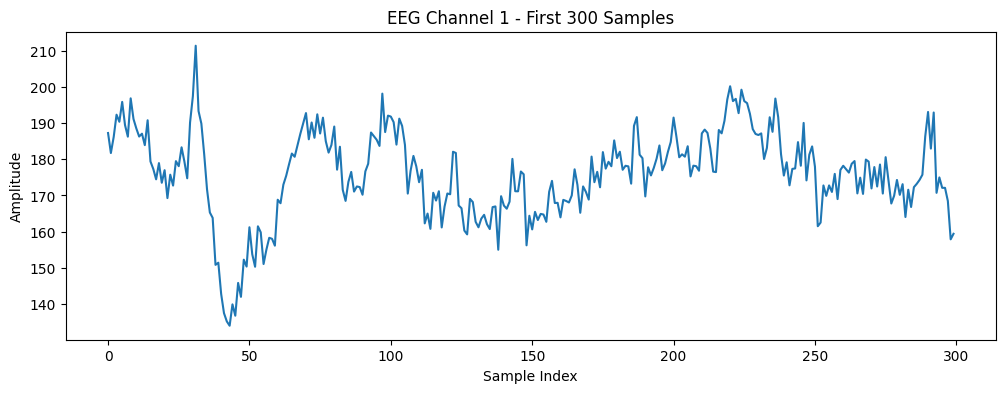

In [ ]:
analyze_xdf_file("S01.xdf")

In [ ]:
from PIL import Image

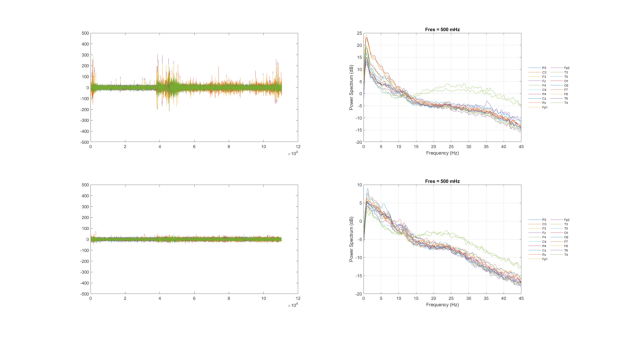

In [ ]:
im = Image.open("/content/S01_EEG+PSDs.tif")
plt.figure(figsize=(8, 8))
plt.imshow(im, cmap='gray' if im.mode=='L' else None)
plt.axis('off')
plt.show()

In [ ]:
import tifffile as tiff

Shape: (1548, 3000, 3)
Data type: uint8


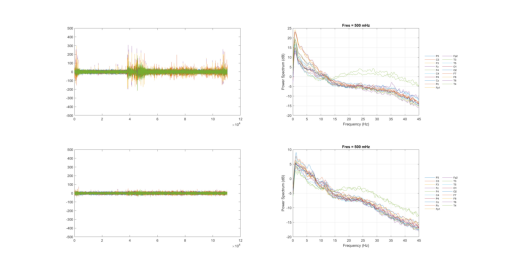

In [ ]:
img = tiff.imread("/content/S01_EEG+PSDs.tif")
print("Shape:", img.shape)
print("Data type:", img.dtype)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.axis('off')
plt.show()

In [ ]:
df_q = pd.read_excel("/content/Questionnaire_Coding.xlsx", header=0, skiprows=[0])

In [ ]:
df_q

,Product Code,Product Description,price,brand,discount,type,need,like,frequent option,product combination,...,other,Unnamed: 12,YES,NO,Unnamed: 15,1 (Not at all),2,3,4,5 (Absolutely)
0,NaN,NaN,A,B,C,D,E,F,G,H,...,J,NaN,A,B,NaN,A,B,C,D,E
1,1.0,'Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,'Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,'Soft Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,'Sliced Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140.0,'Filtered Coffee',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,141.0,'Espresso',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,142.0,'Greek Coffee',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143.0,'Filtered Coffee',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_q = df_q.iloc[1:]
df_q.head()

,Product Code,Product Description,price,brand,discount,type,need,like,frequent option,product combination,...,other,Unnamed: 12,YES,NO,Unnamed: 15,1 (Not at all),2,3,4,5 (Absolutely)
1,1.0,'Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,'Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,'Soft Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,'Sliced Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,'Cheese',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_q.describe()

,Product Code,Unnamed: 12,Unnamed: 15
count,144.000000,0.0,0.0
mean,72.500000,NaN,NaN
std,41.713307,NaN,NaN
min,1.000000,NaN,NaN
25%,36.750000,NaN,NaN
50%,72.500000,NaN,NaN
75%,108.250000,NaN,NaN
max,144.000000,NaN,NaN


In [ ]:
df_q = df_q.drop(columns=["Unnamed: 12", "Unnamed: 15"], errors='ignore')

In [ ]:
df_q.describe()

,Product Code
count,144.000000
mean,72.500000
std,41.713307
min,1.000000
25%,36.750000
50%,72.500000
75%,108.250000
max,144.000000


In [ ]:
df = pd.read_excel("/content/aggregated_processed.xlsx")

In [ ]:
df

,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,Q4,...,Q76_39,Q76_40,Q77_28,Q78_28,Q76_41,Q76_42,Q76_43,Q76_44,Q76_45,Q76_46
0,24,1,1,5,1,2,1.0,1.0,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,2,1,1,3,NaN,NaN,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,2,1,5,1,2,1.0,3.0,8,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,2,1,6,3,2,1.0,2.0,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26,1,2,5,1,2,2.0,1.0,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24,1,1,5,1,2,1.0,3.0,8,7,...,117A,114B,NaN,NaN,114F,125B,125H,136B,136C,136F
6,25,1,1,4,1,2,1.0,1.0,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31,2,1,6,1,2,1.0,2.0,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,54,2,1,3,1,1,3.0,1.0,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,49,2,1,3,2,1,2.0,2.0,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


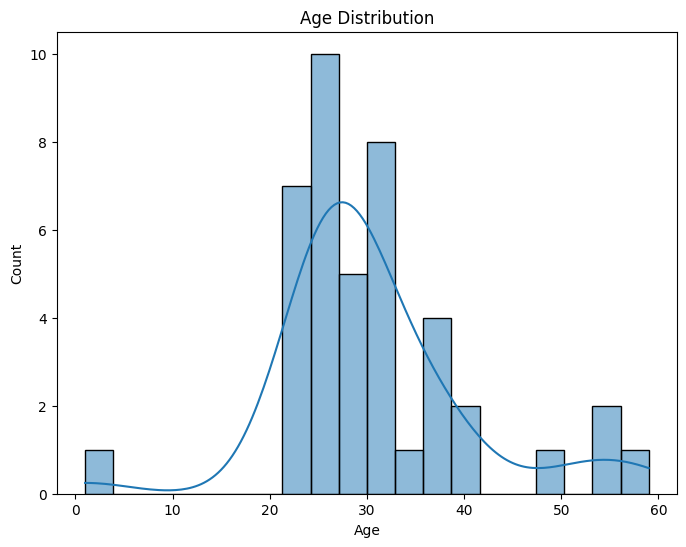

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

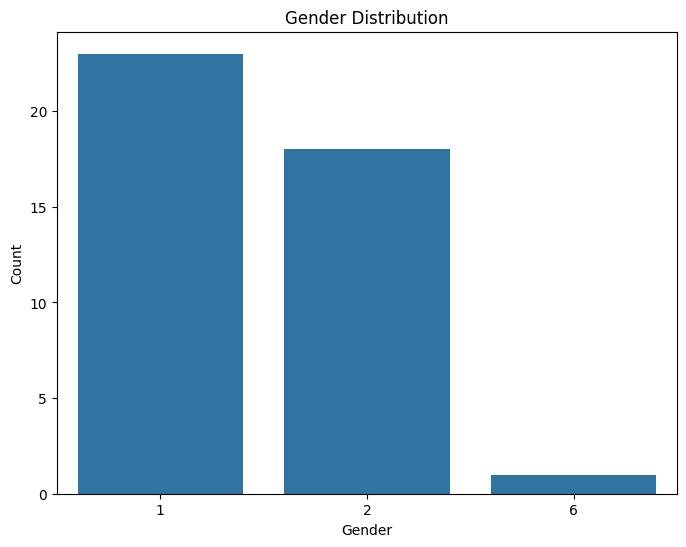

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

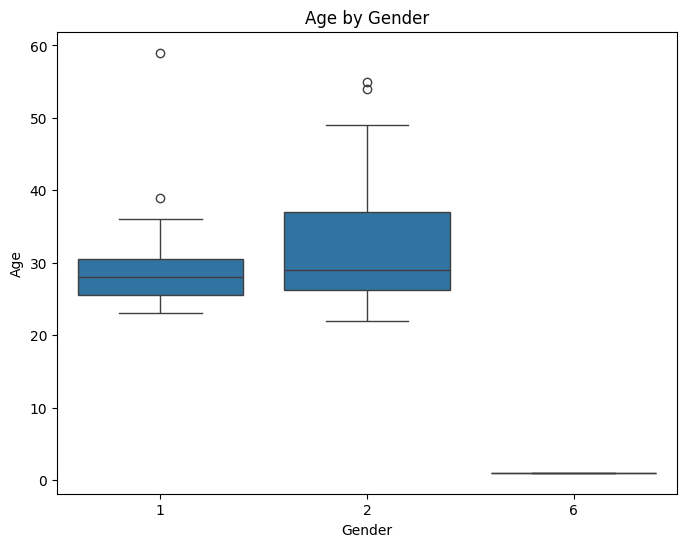

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
# from th graphs it is quite clear that the number 2 is an anomly

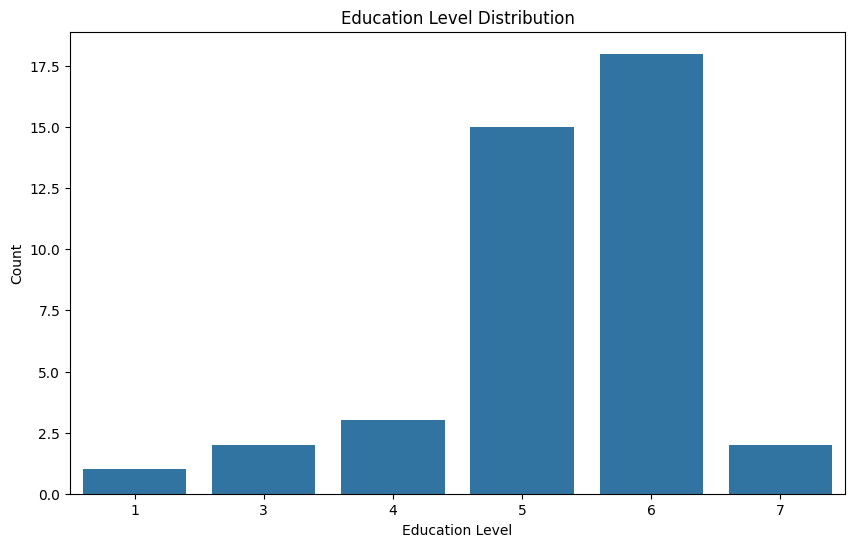

In [ ]:
if 'Education' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Education', order=sorted(df['Education'].dropna().unique()))
    plt.title('Education Level Distribution')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.show()

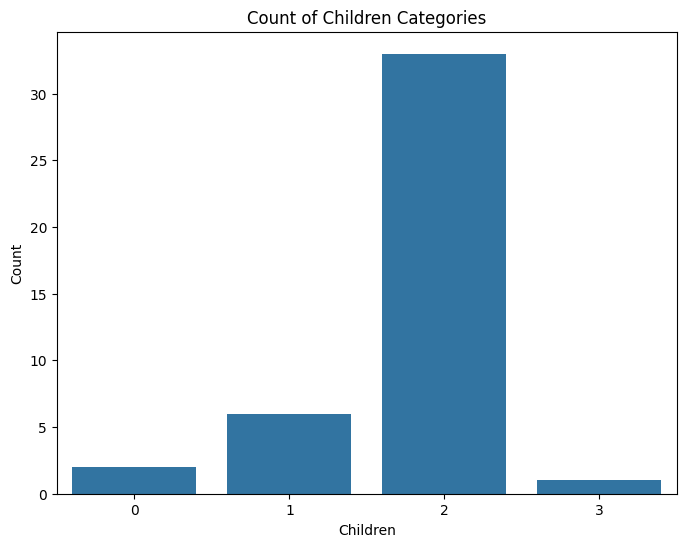

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Children')
plt.title("Count of Children Categories")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Subject Number'] = range(1, len(df)+1)

In [ ]:
cols = ['Subject Number'] + [col for col in df.columns if col != 'Subject Number']
df = df[cols]

In [ ]:
df

,Subject Number,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q76_39,Q76_40,Q77_28,Q78_28,Q76_41,Q76_42,Q76_43,Q76_44,Q76_45,Q76_46
0,1,24,1,1,5,1,2,1.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,6,2,1,1,3,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,22,2,1,5,1,2,1.0,3.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,24,2,1,6,3,2,1.0,2.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,26,1,2,5,1,2,2.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,24,1,1,5,1,2,1.0,3.0,8,...,117A,114B,NaN,NaN,114F,125B,125H,136B,136C,136F
6,7,25,1,1,4,1,2,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,31,2,1,6,1,2,1.0,2.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,54,2,1,3,1,1,3.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,49,2,1,3,2,1,2.0,2.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['Subject Number'] != 2]

In [ ]:
df.to_excel('aggregated_processed.xlsx', index=False)

In [ ]:
df

,Subject Number,Age,Gender,Hand,Education,Marital Status,Children,Q1,Q2,Q3,...,Q76_39,Q76_40,Q77_28,Q78_28,Q76_41,Q76_42,Q76_43,Q76_44,Q76_45,Q76_46
0,1,24,1,1,5,1,2,1.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,22,2,1,5,1,2,1.0,3.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,24,2,1,6,3,2,1.0,2.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,26,1,2,5,1,2,2.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,24,1,1,5,1,2,1.0,3.0,8,...,117A,114B,NaN,NaN,114F,125B,125H,136B,136C,136F
6,7,25,1,1,4,1,2,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,31,2,1,6,1,2,1.0,2.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,54,2,1,3,1,1,3.0,1.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,49,2,1,3,2,1,2.0,2.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,30,2,1,4,1,2,1.0,3.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
demographic_columns = ["Subject Number", "Age", "Gender", "Hand", "Education", "Marital Status", "Children"]

In [ ]:
other_cols = [col for col in df.columns if col not in demographic_columns]

In [ ]:
df['Questions Answered'] = df[other_cols].notnull().sum(axis=1)

<ipython-input-209-5f8b25551a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Questions Answered'] = df[other_cols].notnull().sum(axis=1)


In [ ]:
df[['Questions Answered']].head()

,Questions Answered
0,115
2,130
3,131
4,103
5,167


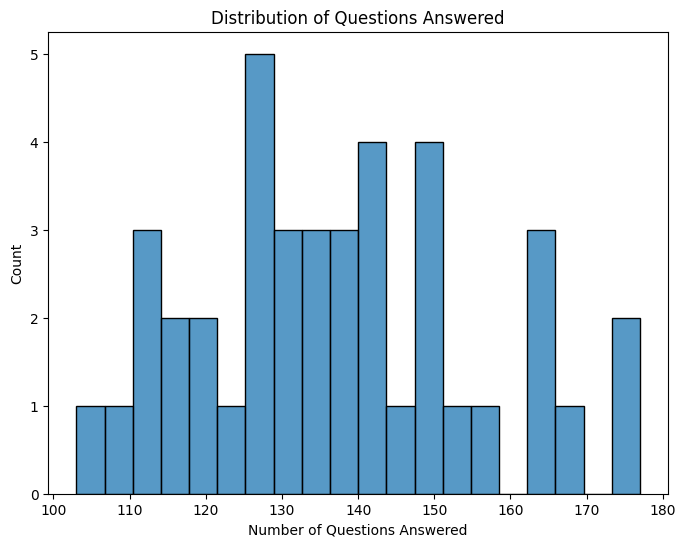

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Questions Answered'], bins=20, kde=False)
plt.title("Distribution of Questions Answered")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Count")
plt.show()

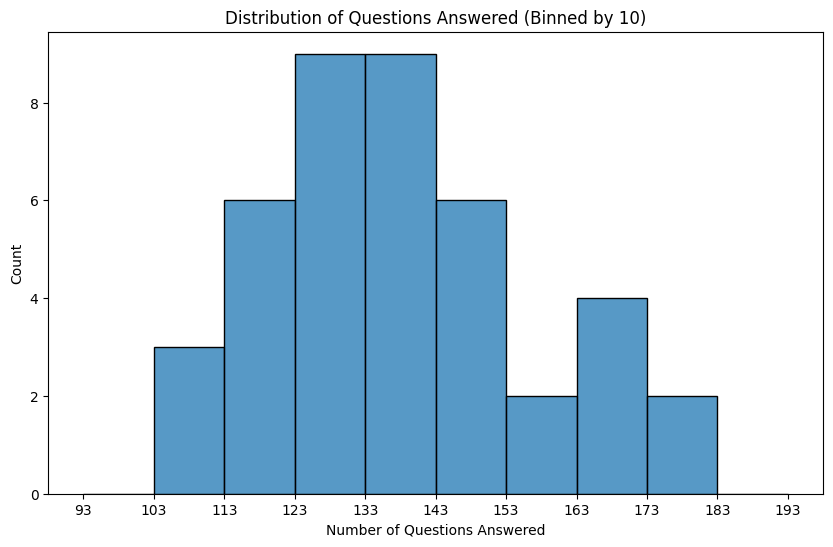

In [ ]:
max_val = df['Questions Answered'].max()
min_val = df['Questions Answered'].min()
bins = np.arange(min_val-10, max_val + 20, 10)

plt.figure(figsize=(10,6))
sns.histplot(df['Questions Answered'], bins=bins, kde=False)
plt.title("Distribution of Questions Answered (Binned by 10)")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Count")
plt.xticks(bins)
plt.show()